In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/train'
test_dir = '/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/test'

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/train/covid')))
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/train/normal')))
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/test/covid')))
print(len(os.listdir('/content/drive/MyDrive/COVID-19 Chest X-ray Image Dataset/test/normal')))

300
260
100
100


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 448 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
14/14 [==============================] - 74s 5s/step - loss: 0.9997 - accuracy: 0.5268 - val_loss: 0.5921 - val_accuracy: 0.6091
Epoch 2/15
14/14 [==============================] - 76s 5s/step - loss: 0.5883 - accuracy: 0.7143 - val_loss: 0.2982 - val_accuracy: 0.9182
Epoch 3/15
14/14 [==============================] - 70s 5s/step - loss: 0.4299 - accuracy: 0.8036 - val_loss: 0.3226 - val_accuracy: 0.8455
Epoch 4/15
14/14 [==============================] - 70s 5s/step - loss: 0.4222 - accuracy: 0.8080 - val_loss: 0.3751 - val_accuracy: 0.8818
Epoch 5/15
14/14 [==============================] - 75s 5s/step - loss: 0.3299 - accuracy: 0.8661 - val_loss: 0.3328 - val_accuracy: 0.8727
Epoch 6/15
14/14 [==============================] - 75s 5s/step - loss: 0.2764 - accuracy: 0.8884 - val_loss: 0.3469 - val_accuracy: 0.9000
Epoch 7/15
14/14 [==============================] - 71s 5s/step - loss: 0.2126 - accuracy: 0.9152 - val_loss: 0.2957 - val_accuracy: 0.9000
Epoch 8/15
14/14 [==

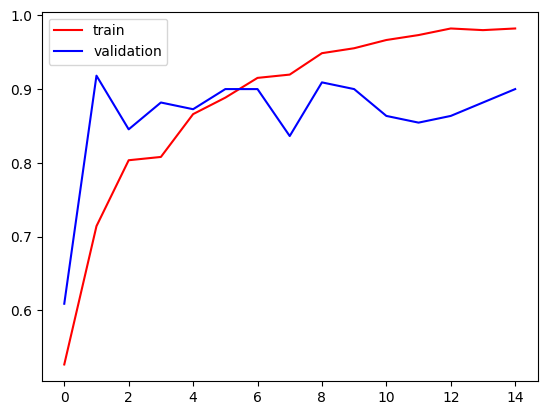

14/14 [==============================] - 27s 2s/step - loss: 0.0079 - accuracy: 1.0000


[0.007923590019345284, 1.0]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()
model.evaluate(train_data)

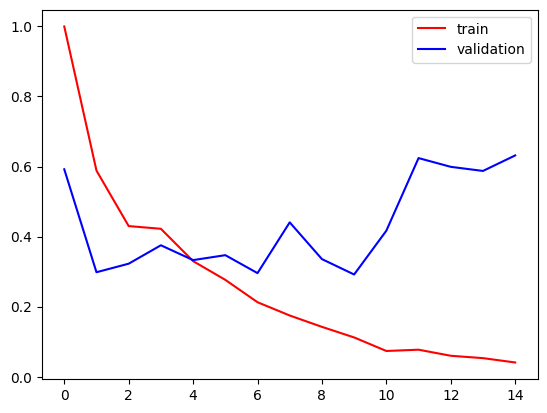

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(validation_data)

4/4 [==============================] - 7s 1s/step - loss: 0.6316 - accuracy: 0.9000


[0.6315961480140686, 0.8999999761581421]

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 200 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)
print(predictions)

7/7 [==============================] - 25s 4s/step
[[6.6525237e-05]
 [2.5630474e-05]
 [1.0000000e+00]
 [9.9999654e-01]
 [9.6837831e-01]
 [2.4915719e-04]
 [4.3882715e-06]
 [7.4438699e-02]
 [2.8715341e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.3171056e-07]
 [1.1049772e-06]
 [1.0000000e+00]
 [3.0328755e-04]
 [9.9999994e-01]
 [1.0000000e+00]
 [9.9996674e-01]
 [2.8732035e-07]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.1652257e-04]
 [9.6519881e-01]
 [1.7507318e-02]
 [1.6750166e-05]
 [1.6003947e-06]
 [1.0000000e+00]
 [9.6688429e-03]
 [1.0000000e+00]
 [9.9999946e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4318319e-07]
 [7.2501660e-07]
 [7.5957847e-01]
 [9.9999726e-01]
 [9.8937024e-05]
 [1.3886657e-01]
 [2.9110940e-02]
 [9.9999750e-01]
 [9.9999988e-01]
 [9.2457646e-01]
 [9.9999994e-01]
 [1.1432704e-0

In [ ]:
len(predictions)

200

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

#Define class labels
class_labels = ['Covid', 'Normal']

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[40 60]
 [49 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.40      0.42       100
           1       0.46      0.51      0.48       100

    accuracy                           0.46       200
   macro avg       0.45      0.46      0.45       200
weighted avg       0.45      0.46      0.45       200



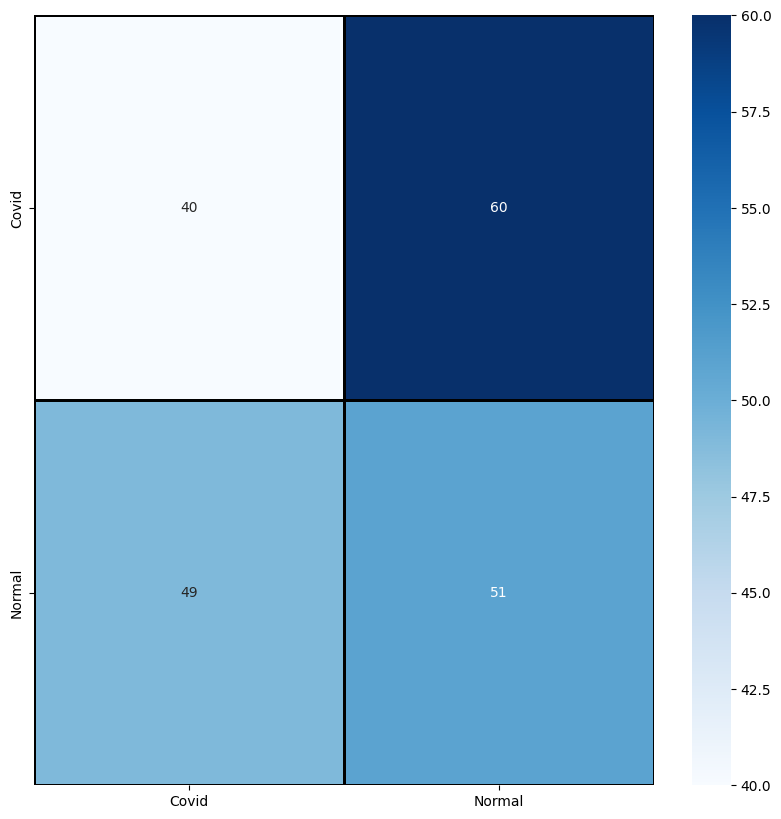

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='Blues', linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=class_labels, yticklabels=class_labels)
plt.show()